# Exercise 3: Bayes and EM

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in this notebook only. **Do not create Python modules and import them**.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
6. Answer to the qualitative question should be written in **markdown** cells (with $\LaTeX$ support).

## In this exercise you will perform the following:
1. Implement EM algorithm.
1. Implement Naive Bayes algorithm that uses EM for calculating the likelihood.
1. Visualize your results.

# I have read and understood the instructions: 206483216

In [1]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function for ploting the decision boundaries of a model
# You will use it later
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    markers = ('.', '.')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## Reading the data

In [3]:
training_set = pd.read_csv('training_set.csv')
test_set = pd.read_csv('test_set.csv')
X_training, y_training = training_set[['x1', 'x2']].values, training_set['y'].values
X_test, y_test = test_set[['x1', 'x2']].values, test_set['y'].values

In [4]:
len(training_set)
len(test_set)

1000

## Visualizing the data ( 10 points)

Plot the following graphs for the training set:

For the first feature only:
1. For the first 1000 data points plot a histogram for each class on the same graph (use bins=20, alpha=0.5).
1. For all the data points plot a histogram for each class on the same graph (use bins=40, alpha=0.5).

For both features:
1. For the first 1000 data points plot a scatter plot where each class has different color
1. For all the data points plot a scatter plot where each class has different color

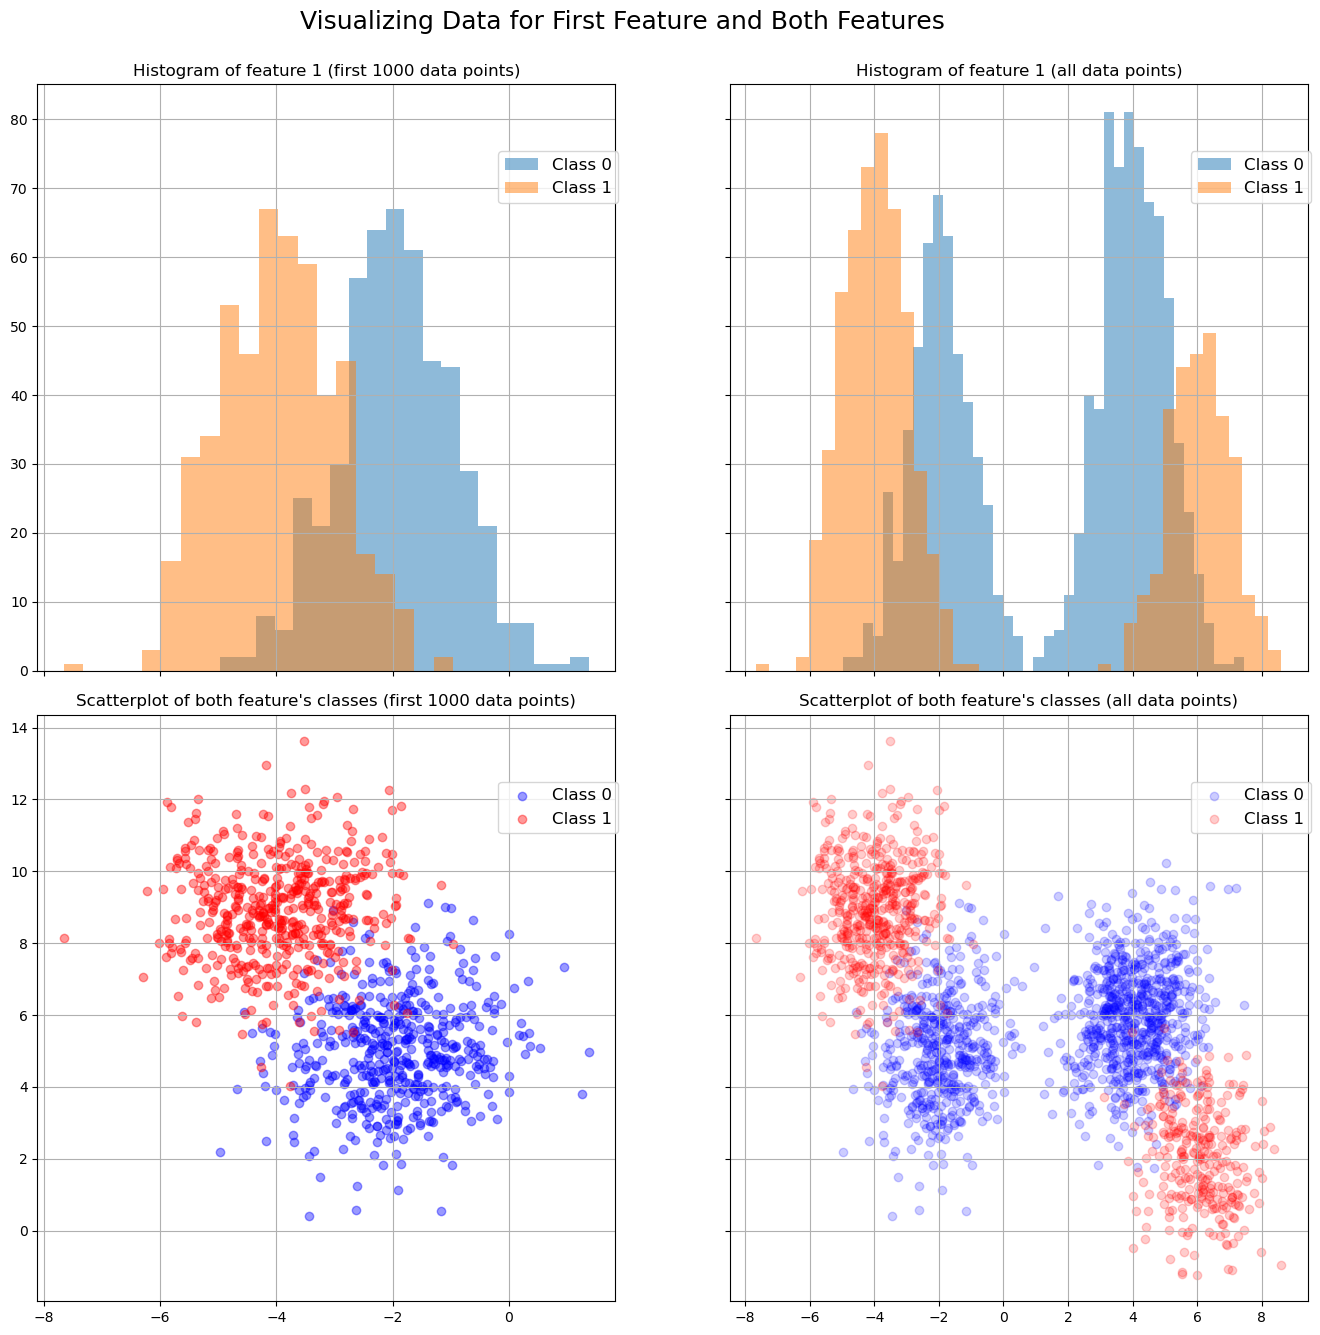

In [5]:
def histogram_visualization(data_0, data_1, bins, alpha, title):
    plt.hist(data_0, bins=bins, alpha=alpha, label='y=0')
    plt.hist(data_1, bins=bins, alpha=alpha, label='y=1')
    plt.legend()
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()
    
def scatter_visualization(data_0, data_1, title):
    plt.scatter(data_0[:, 0], data_0[:, 1], label='y=0')
    plt.scatter(data_1[:, 0], data_1[:, 1], label='y=1')
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()
    
fig = plt.figure(figsize=(14, 14)) 
fig.suptitle('Visualizing Data for First Feature and Both Features', fontsize=18)    
gs = fig.add_gridspec(2, 2, hspace=0.5, wspace=0.5, bottom=0.5,
                       left=0.45, right=0.5)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')



y_cut = y_training[:1000]
x_cut = X_training[:1000]
split_df = training_set[:1000]

for i_class in np.unique(y_training):

    ax1.hist(x_cut[:,0][y_cut == i_class], bins=20, alpha = 0.5, label='Class '+str(i_class))

    ax2.hist(X_training[:,0][y_training == i_class], bins=40, alpha = 0.5, label='Class '+str(i_class))
                            
    ax3.scatter(data=split_df[split_df['y']==i_class],x= 'x1',y= 'x2', c=['blue','red'][i_class],label = 'Class ' + str(i_class), alpha = .4)

    ax4.scatter(data=training_set[training_set['y'] == i_class], x='x1', y='x2', alpha=0.2, label='Class '+str(i_class), c=['blue','red'][i_class])

ax1.legend(loc=1, bbox_to_anchor=(1.02, .9), prop={'size': 12})
ax2.legend(loc=1, bbox_to_anchor=(1.02, .9), prop={'size': 12})
ax3.legend(loc=1, bbox_to_anchor=(1.02, .9), prop={'size': 12})
ax4.legend(loc=1, bbox_to_anchor=(1.02, .9), prop={'size': 12})

ax1.grid(True)
ax1.plot()
ax2.grid(True)
ax2.plot()
ax3.grid(True)
ax3.plot()
ax4.grid(True)
ax4.plot()
    
ax1.set_title("Histogram of feature 1 (first 1000 data points)")
ax2.set_title('Histogram of feature 1 (all data points)')
ax3.set_title("Scatterplot of both feature's classes (first 1000 data points)")
ax4.set_title("Scatterplot of both feature's classes (all data points)")

gs.tight_layout(fig, rect=[0, 0.03, 1, .98]) 
plt.show()

## Normal distribution pdf (10 Points)

Implement the normal distribution pdf 
$$
f(x;\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big{(}\frac{x-\mu}{\sigma}\big{)}^2}
$$
Write efficient vectorized code

In [6]:
# calc normal pdf    
def norm_pdf(data, mu, sigma):
    coefficient = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -0.5 * ((data - mu) / sigma) ** 2
    pdf = coefficient * np.exp(exponent)
    return pdf


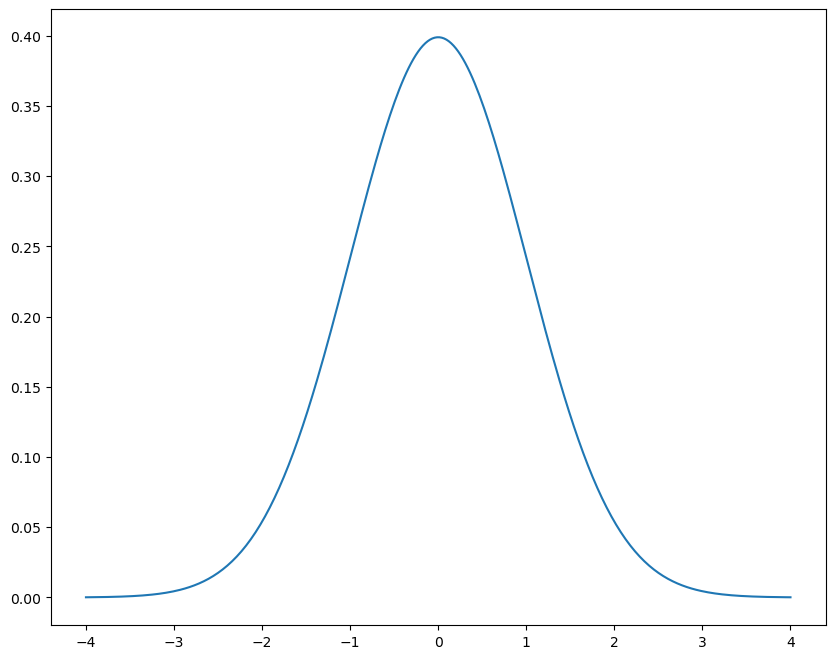

In [7]:
#Self check
check = np.linspace(-4,4,300)
plt.plot(check,norm_pdf(check,0,1))
plt.show()

## Expectation Maximization (30 Points)

Implement the Expectation Maximization algorithm for gaussian mixture model.

The class should hold the distribution params.

Use negative log likelihood as the cost function:
$$
cost(x) = \sum_{i=1}^{m}-log\bigg(\sum_{j=1}^{k}w_j * pdf(x_i; \mu_j, \sigma_j)\bigg)
$$

\* Where i is the index of the instances (from 1 to m) and j is the index of the gaussian in the GMM (from 1 to k). 

Your class should contain the following functions:
1. init_params - initialize distribution params
1. expectation - calculating responsibilities
1. maximization - updating distribution params
1. fit - the learning function (this function calls the init_params and then iteratively calls expectation and maximization)
1. get_dist_params - return the params of the distribution (the GMM distribution) 

\* You can add more functions if you think this is necessary

Don't change the eps params (eps=0.01)

When you need to calculate the pdf of a normal distribution use the function `norm_pdf` that you implemented above.

In [8]:
class EM(object):
    """
    Naive Bayes Classifier using Gaussian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of gaussians in each dimension
    n_iter : int
      Passes over the training dataset in the EM process
    eps: float
      Minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1, n_iter=1000, eps=0.01):
        self.k = k
        self.n_iter = n_iter
        self.eps = eps

    # Initial guesses for parameters
    def init_params(self, data):
        """
        Initialize distribution params
        """
        self.ws = np.full(self.k, 1.0 / self.k)
        self.mus = []
        self.sigmas = []
        # Guess mu as center of K quantiles
        quat_data, bins = pd.qcut(data, self.k, retbins=True, labels=False)
        self.mus = (bins[:-1] + bins[1:]) / 2
        # Guess sigma as empirical sigma
        self.sigmas = np.array([np.sqrt(np.mean((data[quat_data == k] - self.mus[k]) ** 2)) for k in range(self.k)])

    def expectation(self, data):
        """
        E step - calculating responsibilities
        """
        new_data_shape = data.reshape(-1, 1) 
        numer = self.ws * norm_pdf(new_data_shape, self.mus, self.sigmas)
        denom = numer.sum(axis=1)
        self.res = numer / denom.reshape(-1, 1)
        
    def maximization(self, data):
        """
        M step - updating distribution params
        """
        new_ws = self.res.mean(axis=0)
        new_mus = (self.res * data.reshape(-1, 1)).mean(axis=0) / new_ws
        new_sigmas = np.sqrt((np.power(data.reshape(-1, 1) - new_mus, 2) * self.res).mean(axis=0) / new_ws)
        
        self.ws = new_ws
        self.mus = new_mus
        self.sigmas = new_sigmas
        
    def compute_cost(self, data):
        """
        Cost function
        """
        cost = (-np.log((norm_pdf(data.reshape(-1, 1), self.mus, self.sigmas) * self.ws).sum(axis=1))).sum()
        return cost
    
    def fit(self, data):
        """ 
        Fit training data (the learning phase).
        Use init_params and then expectation and maximization function to find params 
        for the distribution. 
        Store the params in attributes of the EM object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.
        """
        self.init_params(data)
        
        # Compute the cost for the initial values
        costs = [self.compute_cost(data)]
        
        for i in range(self.n_iter):
            # Expectation
            self.expectation(data)
            
            # Maximization
            self.maximization(data)
            
            # Compute the new cost after updating the values
            costs.append(self.compute_cost(data))

            # Break if the difference in costs is smaller than eps
            if abs(costs[-1] - costs[-2]) < self.eps:
                break
                
    def get_dist_params(self):
        return self.ws, self.mus, self.sigmas


## Naive Bayes (30 Points)

Implement the Naive Bayes algorithm.

For calculating the likelihood use the EM algorithm that you implemented above to find the distribution params. With these params you can calculate the likelihood probability.

Calculate the prior probability directly from the training set.

Your class should contain the following functions:
1. fit - the learning function
1. predict - the function for predicting an instance (or instances) after the fit function was executed

\* You can add more functions if you think this is necessary


In [9]:
class NaiveBayesGaussian(object):
    """
    Naive Bayes Classifier using Gaussian Mixture Model (EM) for calculating the likelihood.

    Parameters
    ------------
    k : int
      Number of Gaussians in each dimension
    random_state : int
      Random number generator seed for random params initialization.
    """
    
    def __init__(self, k=1):
        self.k = k

    def fit(self, X, y):
        """ 
        Fit training data.

        Parameters
        ----------
        X : array-like, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        """
        self.gmm_parameters = []  # store ws, mus, and sigmas for each class
        self.class_priors = self.calculate_class_priors(y)
        self.unique_classes = np.unique(y)
        
        for class_val in np.unique(y):
            for feature in range(X.shape[1]):
                em = EM(k=self.k)
                em.fit(X[:, feature][y == class_val])
                self.gmm_parameters.append(em.get_dist_params())
                
    def calculate_class_priors(self, y):
        # Get unique values and their counts
        unique_classes, counts = np.unique(y, return_counts=True)
        class_priors = counts / y.size
        
        return class_priors
    
    def predict(self, X):
        """Return the predicted class label"""
        
        likelihoods_by_class = []  # list that stores the likelihoods of each instance by each class P(instance|class)
        gmm_param_idx = 0  # counter to get the right GMM parameters
        
        # iterate over the number of unique classes
        for class_idx in range(len(self.unique_classes)):
            likelihood = np.ones(X.shape[0])  # initiate likelihood for each class
            
            # iterate over the number of features
            for feature_idx in range(X.shape[1]):
                
                # get the correct set of GMM parameters from the list
                ws, mus, sigmas = self.gmm_parameters[gmm_param_idx] 
                
                # we assume independence, so p(instance|class) = p(x0|c) * p(x1|c) * ...
                likelihood *= (ws * norm_pdf(X[:, feature_idx].reshape(-1, 1), mus, sigmas)).sum(axis=1) 
                
                gmm_param_idx += 1 
                
            likelihoods_by_class.append(likelihood)
            
        # combine the likelihoods of the instances in each class using class priors to compute posteriors
        posteriors = np.transpose(likelihoods_by_class) * self.class_priors
        
        # prediction
        predictions = np.argmax(posteriors, axis=1)
        
        return predictions


In [10]:
#For me
classes , counts = np.unique(y_training,return_counts=True)
print(classes , counts)
np.where(y_training == 1)[0]
X_training[y_training == 1][: , 1]
np.arange(X_training.shape[1])
X_training[4][1]
X_training[:1000].reshape(-1)

[0 1] [1200  800]


array([-1.38578869,  9.13146361, -2.23690338, ...,  9.89802371,
       -6.01573403,  8.01933021])

## Model evaluation (10 points)

1. Use the first 1000 points from the training set (take the first original 1000 points - before the shuffle) and the first 500 points from the test set.
1. Fit the Naive Bayes model. Remember that you need to select the number of Gaussians in the EM.
1. Print the training and test accuracies for the model.
1. Use the `plot_decision_regions` function to plot the decision boundaries for the model (for this you need to use the training set as the input)

Use all the training set points:
1. Repeat sections 2-4 for all the training set points

Training Accuracy: 0.968
Test Accuracy: 0.942


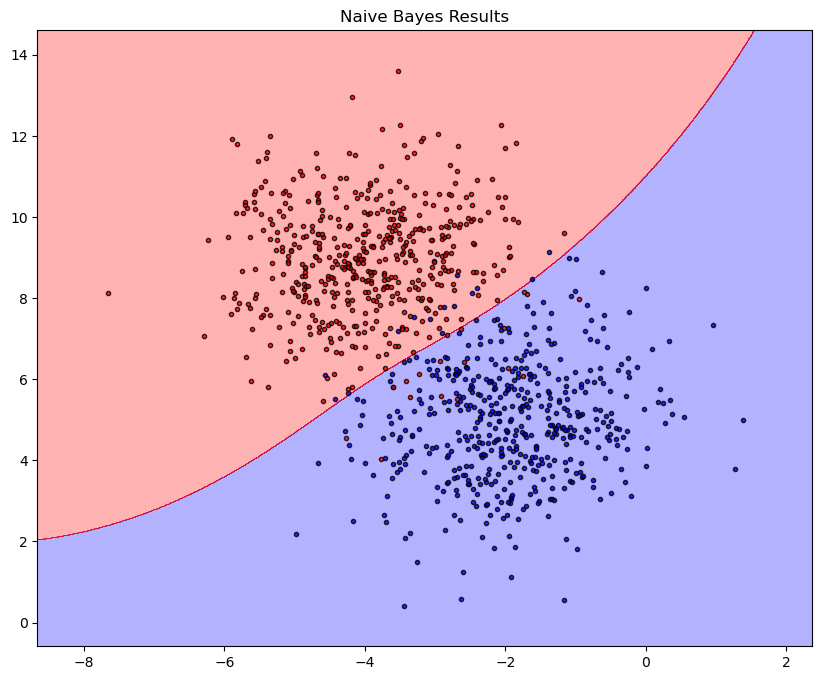

In [11]:
#Using 1000 points from the training and 500 from the test
X_train_subset = X_training[:1000]
y_train_subset = y_training[:1000]
X_test_subset = X_test[:500]
y_test_subset = y_test[:500]

naive_bayes_model = NaiveBayesGaussian(k=2)  # Choose the number of Gaussians in the EM
naive_bayes_model.fit(X_train_subset, y_train_subset)

# Print the training accuracy
y_train_pred = naive_bayes_model.predict(X_train_subset)
train_accuracy = accuracy_score(y_train_subset, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Print the test accuracy
y_test_pred = naive_bayes_model.predict(X_test_subset)
test_accuracy = accuracy_score(y_test_subset, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Plot decision boundaries using training set
plot_decision_regions(X_train_subset, y_train_subset, naive_bayes_model)
plt.title("Naive Bayes Results")
plt.show()


Training Accuracy: 0.9215
Test Accuracy: 0.902


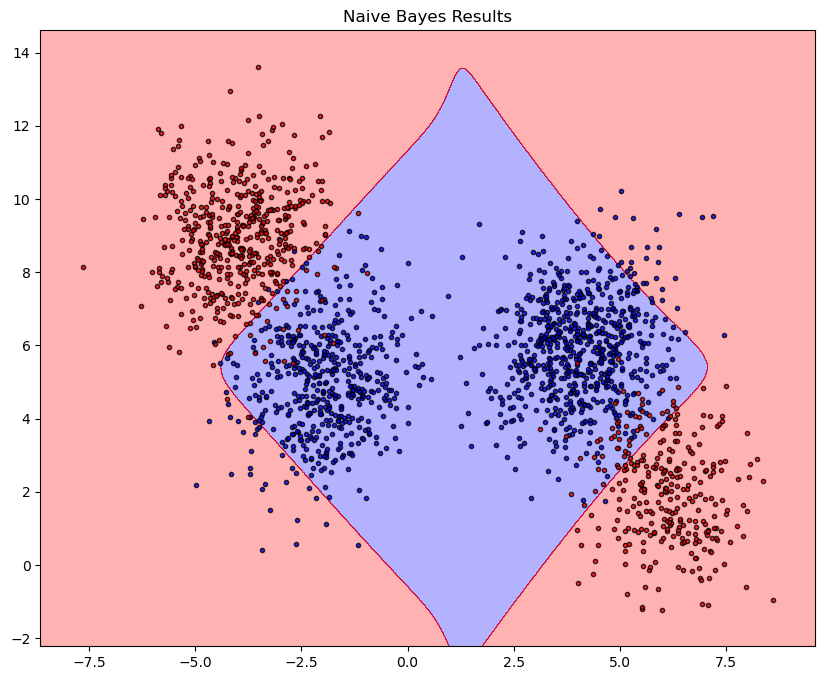

In [12]:
#All data points
naive_bayes_model = NaiveBayesGaussian(k=2)  # Choose the number of Gaussians in the EM
naive_bayes_model.fit(X_training, y_training)

# Print the training accuracy
y_train_pred = naive_bayes_model.predict(X_training)
train_accuracy = accuracy_score(y_training, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Print the test accuracy
y_test_pred = naive_bayes_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Plot decision boundaries using training set
plot_decision_regions(X_training, y_training, naive_bayes_model)
plt.title("Naive Bayes Results")
plt.show()

## Open question (10 points) 

In the previous course we implemented the Logistic regression algorithm and we have now completed the implementation of Naive Bayes using EM. 

- Generate one dataset that you think Naive Bayes will work better than Logistic Regression.
- Generate another dataset that you think Logistic Regression will work better than Naive Bayes using EM.
- Explain the reasoning behind each dataset.  

(The number of features and instances is up to you, but use only 2 classes)

2. Visualize the datasets like in the beginning of this notebook.

In [13]:
# You are provided with the Logistic regression class if you need it

class LogisticRegressionGD(object):
    """
    Logistic Regression Classifier using gradient descent.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    eps : float
      minimal change in the cost to declare convergence
    random_state : int
      Random number generator seed for random weight
      initialization.
    """
    
    def __init__(self, eta=0.00005, n_iter=10000, eps=0.000001, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.eps = eps
        self.random_state = random_state

    def fit(self, X, y):
        """ 
        Fit training data (the learning phase).
        Updating the theta vector in each iteration using gradient descent.
        Store the theta vector in an attribute of the LogisticRegressionGD object.
        Stop the function when the difference between the previous cost and the current is less than eps
        or when you reach n_iter.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        """
        rgen = np.random.RandomState(self.random_state)
        self.theta = np.random.normal(loc=0.0, scale=1, size=1 + X.shape[1])
        self.cost = []
        old_cost = 0
        output = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (output - y)
            self.theta[1:] -= self.eta * X.T.dot(errors)
            self.theta[0] -= self.eta * errors.sum()
            # note that we compute the logistic `cost` now
            # instead of the sum of squared errors cost
            cost = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))).sum() / X.shape[0]
            if abs(cost - old_cost) < self.eps:
                break
            old_cost = cost
            self.cost.append(cost)
    
    def predict(self, X):
        """Return the predicted class label"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.theta[1:]) + self.theta[0]

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))


### Dataset1: Dataset where Naive Bayes should work better
The data exhibits a clear inability to be linearly separated. In such cases, the Naive Bayes model proves advantageous as it can accommodate circular patterns and account for dependencies between features. On the other hand, Logistic Regression lacks this capability, making it less suitable for handling such complex data structures.






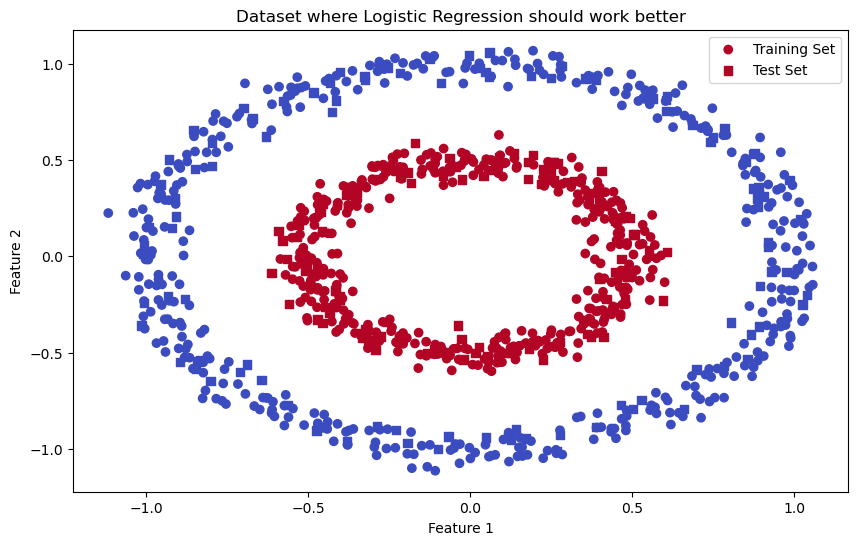

In [14]:
# Generate circle data
N = 1000  # number of data points
X, y = make_circles(n_samples=N, factor=.5, noise=.05, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the training and test sets
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Training Set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='s', label='Test Set')
plt.title('Dataset where Logistic Regression should work better')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Training Accuracy: 0.99625
Test Accuracy: 0.995


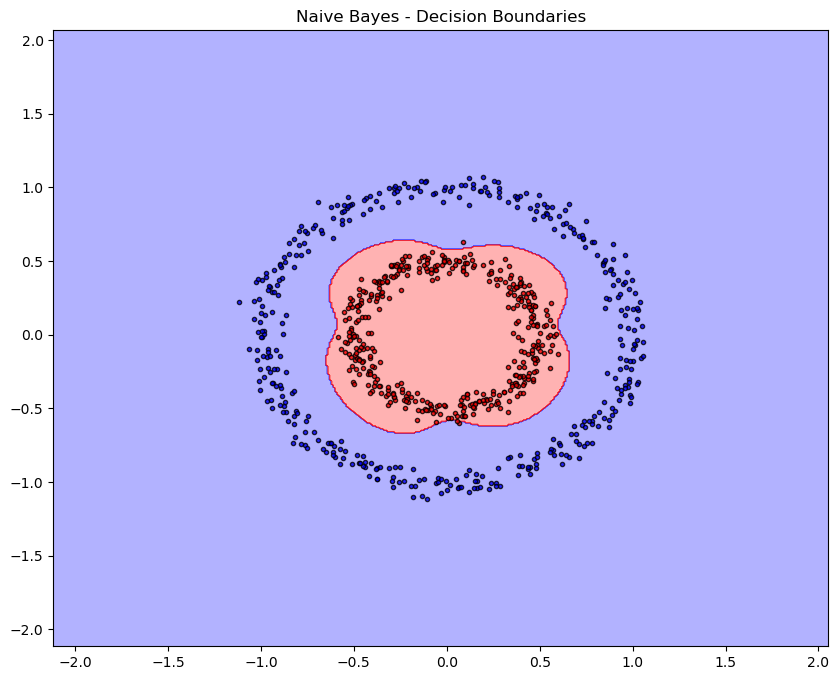

In [15]:
# Fit the Naive Bayes model
nb_model = NaiveBayesGaussian(k=2)  # Choose the number of Gaussians in the EM
nb_model.fit(X_train, y_train)

# Print the training accuracy
y_train_pred = nb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Print the test accuracy
y_test_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


# Plot decision boundaries using training set
plot_decision_regions(X_train, y_train, nb_model)
plt.title("Naive Bayes - Decision Boundaries")
plt.show()

### Dataset2: Dataset where Logistic Regression should work better
It possesses informative attributes, lacks redundancy, exhibits well-defined class distinctions, and maintains equal class weights. These characteristics enable Logistic Regression to identify a linear decision boundary that effectively separates the classes. In contrast, Naive Bayes is expected to yield inferior predictions due to its limited performance.


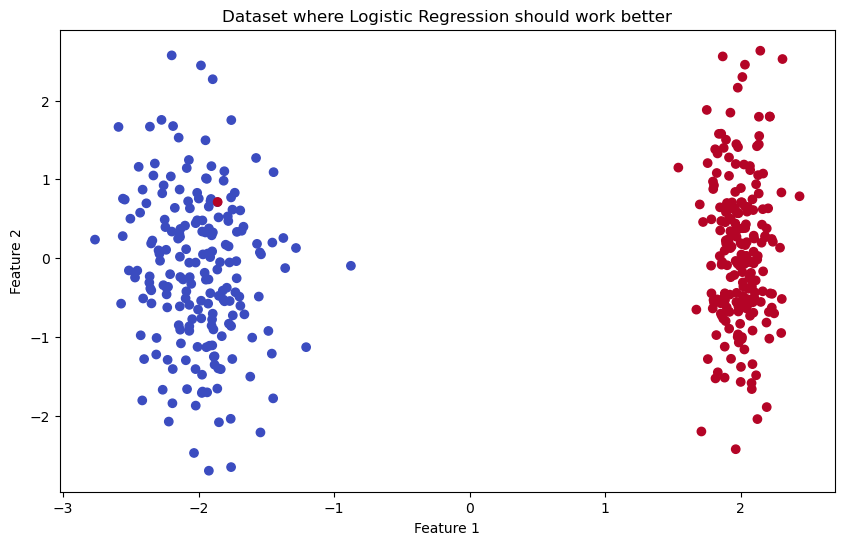

In [16]:
# Generating a dataset where Logistic Regression should work better
X, y = make_classification(n_samples=500, n_features=2, n_informative=1, n_redundant=0, 
                            n_clusters_per_class=1, weights=[0.5, 0.5], random_state=42, class_sep=2)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Visualizing the dataset
plt.figure(figsize=(10,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='coolwarm')
plt.title('Dataset where Logistic Regression should work better')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Training Accuracy: 0.9975
Test Accuracy: 1.0


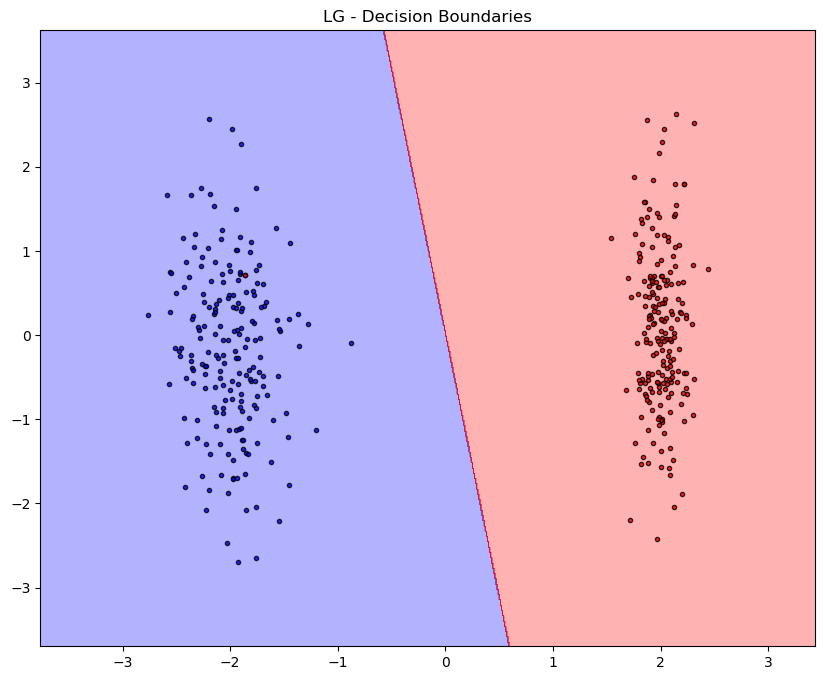

In [17]:
# Fit the Naive Bayes model
LG_model = LogisticRegressionGD()  # Choose the number of Gaussians in the EM
LG_model.fit(X_train, y_train)

# Print the training accuracy
y_train_pred = LG_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Print the test accuracy
y_test_pred = LG_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


# Plot decision boundaries using training set
plot_decision_regions(X_train, y_train, LG_model)
plt.title("LG - Decision Boundaries")
plt.show()
